In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scl


%matplotlib notebook
%matplotlib inline

In [7]:
def opt_plot():
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,
                    labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,
                    labelsize=15)

In [ ]:
hbar = 1 #Constante de Planck reduzida
m = 1  #Massa da partícula
N = 512 #Número de pontos na grade
a = 1.0 #Largura do poço
x = np.linspace(-a/2.,a/2.,N)
pi = np.pi

h = x[1]-x[0] # Deve ser igual a 2*pi/(N-1)
V = 0.*x #Potencial
Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) 
                + np.diag(np.ones(N-1),1)) #Matriz de discretização de derivada de segunda ordem

H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V)  #Matriz Hamiltoniana

In [9]:
E,psiT = np.linalg.eigh(H) 
psi = np.transpose(psiT)   

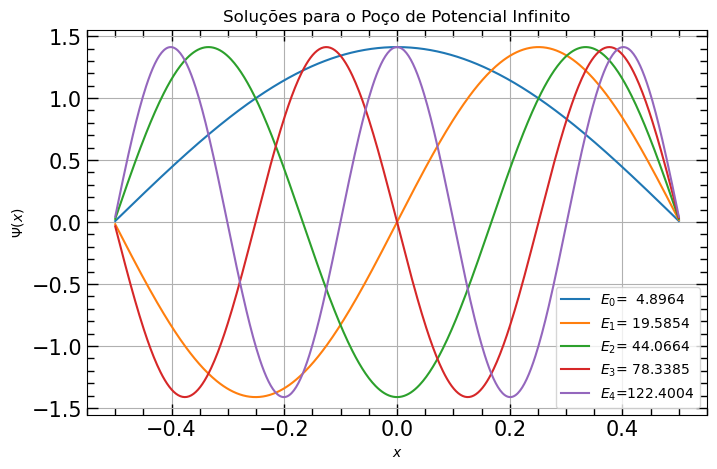

In [10]:
plt.figure(figsize=(8,5))
for i in range(5):
    if psi[i][N-10] < 0:   
        plt.plot(x,-psi[i]/np.sqrt(h),label="$E_{}$={:>8.4f}".format(i,E[i]))
    else:
        plt.plot(x,psi[i]/np.sqrt(h),label="$E_{}$={:>8.4f}".format(i,E[i]))
        plt.title("Soluções para o Poço de Potencial Infinito")
        plt.xlabel("$x$")
        plt.ylabel("$\Psi(x)$")
plt.legend()
plt.grid()

opt_plot()
plt.show()